In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
f0 = 2400 #Гц
Vmod = 600 #Бод
Vinf = 2400 #бит/с

In [4]:
T = 1 / Vmod
m = math.ceil(Vinf / Vmod)
q = 2 ** m 
A = 1 #амплитуда
Ns = 40
dt = (1/f0)/Ns

In [5]:
#Получение коэффициентов по номеру сигнала
def getSi12(i):
    i1 = i // np.sqrt(q)
    i2 = i % np.sqrt(q)
    si1 = A*(1 - ((2*i1)/(np.sqrt(q)-1)))
    si2 = A*(1 - ((2*i2)/(np.sqrt(q)-1)))
    return si1, si2


S = lambda si, t:   si[0] * np.sqrt(2 / T) * \
                    np.cos(2 * np.pi * f0 * t) + \
                    si[1] * np.sqrt(2 / T) * \
                    np.sin(2 * np.pi * f0 * t)

#Ортонормированные функции 
phi1 = lambda t: np.sqrt(2 / T) *  np.cos(2 * np.pi * f0 * t) #3.1
phi2 = lambda t: np.sqrt(2 / T) *  np.sin(2 * np.pi * f0 * t)                    

In [6]:
t = np.arange(0, T, dt)

In [7]:
#Проверка равенства (3.1)
print('(phi1, phi1) = {}'.format(np.trapz(phi1(t) * phi1(t), dx=dt)))
print('(phi1, phi2) = {}'.format(np.trapz(phi1(t) * phi2(t), dx=dt)))
print('(phi2, phi1) = {}'.format(np.trapz(phi2(t) * phi1(t), dx=dt)))
print('(phi2, phi2) = {}'.format(np.trapz(phi2(t) * phi2(t), dx=dt)))

(phi1, phi1) = 0.987652948386578
(phi1, phi2) = 0.0009656781074217635
(phi2, phi1) = 0.0009656781074217635
(phi2, phi2) = 0.9998470516134227


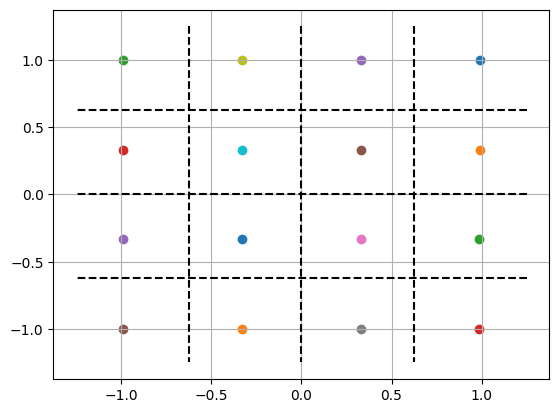

In [8]:
for i in range(q):
    Si12 = getSi12(i)
    Si = S(Si12, t)
    x = phi1(t)
    y = phi2(t)
    Sijx = np.trapz(Si * x, dx=dt)
    Sijy = np.trapz(Si * y, dx=dt)
    plt.scatter(Sijx, Sijy)

size = int(np.sqrt(q))
dx = 1 / size
areas = np.linspace(-1.0 - dx, 1.0 + dx, size + 1)
for i, val in enumerate(areas):
    if i == 0 or i == size:
        continue
    plt.plot([val, val], [1.0 + dx, -1.0 - dx], color='black', linestyle='--')
    plt.plot([1.0 + dx, -1.0 - dx], [val, val], color='black', linestyle='--')

#plt.legend()
plt.grid()
plt.show()